In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks to Approximate Solution of PDEs

In [2]:
from pinn import PINNTrainer
import matplotlib.pyplot as plt
import numpy as np

# Your task: Solve the system of equations using PINNs

System of two linear reaction-convection-diffusion equations

You will have to implement the following
1. initialize the approximate neural network solution
2. implement the functions add interior points, add temporal boundary points,
   and add spatial boundary points; 
3. implement the function apply initial condition;
4. implement the function apply boundary conditions;
5. implement the function compute pde residuals;
6. train the model.









# Setting up the training data

Just familiarize yourself with how we generate collocation points for the different types of residuals.

In [3]:
kwargs = {
    "alpha_f" :0.05 ,
    "h_f" : 5,
    "T_hot" : 4,
    "u_f" : 1,
    "alpha_s" : 0.08,
    "h_s" : 6,
    "T0" : 1,
}

In [4]:
# Solve the heat equation:
# u_t = u_xx, (t,x) in [0, 0.1]x[-1,1]
# with zero dirichlet BC and
# u(x,0)= -sin(pi * x).

n_int = 256
n_sb = 64
n_tb = 64

pinn = PINNTrainer(n_int, n_sb, n_tb, **kwargs)

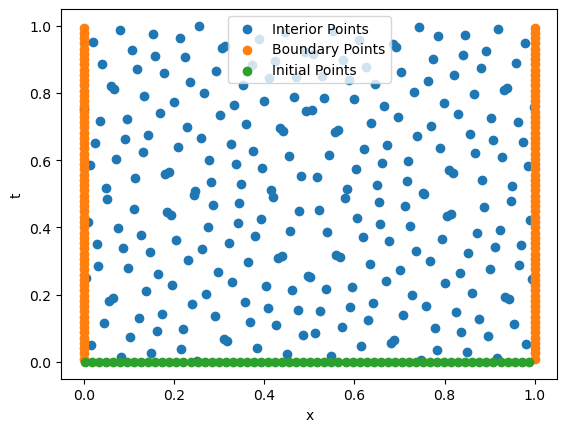

In [5]:
# Plot the input training points.
input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()

plt.scatter(
    input_int_[:, 1].detach().numpy(),
    input_int_[:, 0].detach().numpy(),
    label="Interior Points")
plt.scatter(
    input_sb_[:, 1].detach().numpy(),
    input_sb_[:, 0].detach().numpy(),
    label="Boundary Points")
plt.scatter(
    input_tb_[:, 1].detach().numpy(),
    input_tb_[:, 0].detach().numpy(),
    label="Initial Points")

plt.xlabel("x")
plt.ylabel("t")
plt.legend()

plt.show()

# Training

Train your network and ensure your loss is low, and that your predictions are qualitatively similar to the true solution (plots should look similar).

In [6]:
hist = pinn.fit(num_epochs=1, verbose=True)

################################  0  ################################
Total loss:  1.6116 | PDE Loss:  0.6053 | Function Loss:  -0.232
Total loss:  1.6069 | PDE Loss:  0.6007 | Function Loss:  -0.2419
Total loss:  1.5859 | PDE Loss:  0.5801 | Function Loss:  -0.2879
Total loss:  1.3505 | PDE Loss:  0.3489 | Function Loss:  -1.0628
Total loss:  1.2104 | PDE Loss:  0.1999 | Function Loss:  -0.4104
Total loss:  1.324 | PDE Loss:  0.1274 | Function Loss:  0.8853
Total loss:  1.1784 | PDE Loss:  0.1739 | Function Loss:  -0.8144
Total loss:  1.144 | PDE Loss:  0.1387 | Function Loss:  -0.7715
Total loss:  1.1358 | PDE Loss:  0.13 | Function Loss:  -0.7483
Total loss:  1.077 | PDE Loss:  0.0647 | Function Loss:  -0.4761
Total loss:  1.0528 | PDE Loss:  0.002 | Function Loss:  0.0959
Total loss:  1.0305 | PDE Loss:  0.0009 | Function Loss:  -0.1499
Total loss:  1.0061 | PDE Loss:  -0.0328 | Function Loss:  -0.0615
Total loss:  0.9979 | PDE Loss:  -0.0719 | Function Loss:  0.1698
Total loss:  0

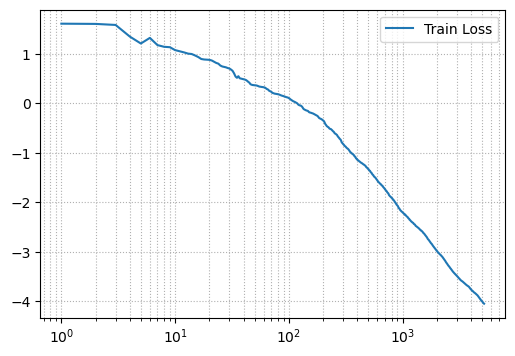

In [9]:
plt.figure(dpi=100, figsize=(6, 4))
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1, len(hist) + 1), hist, label="Train Loss")
plt.xscale("log")
plt.legend()

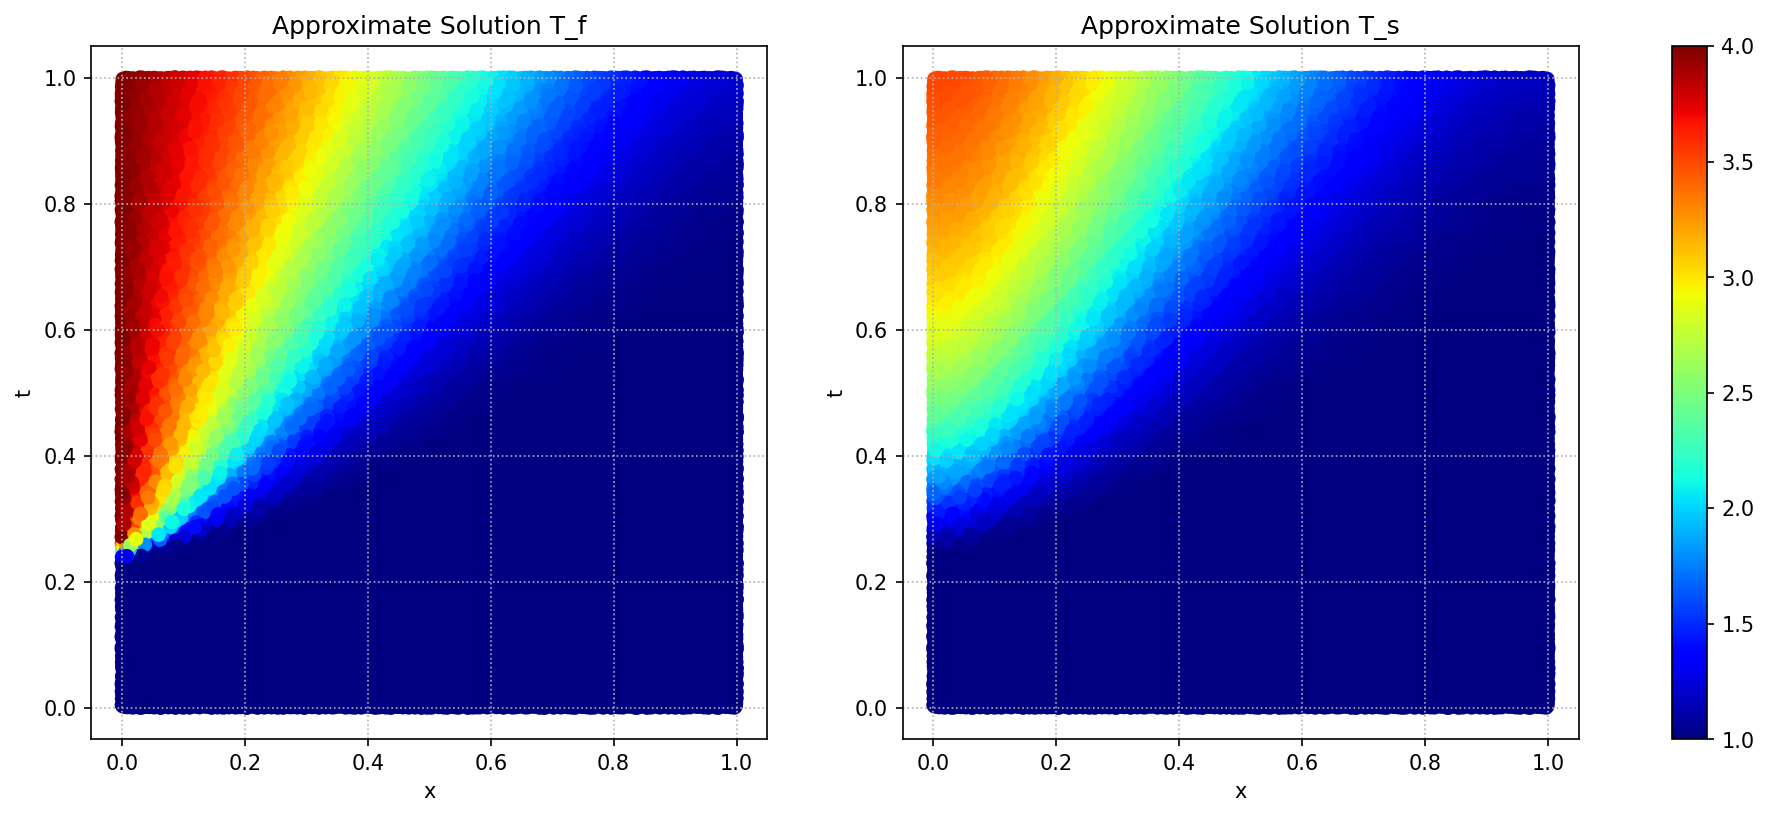

In [19]:
pinn.plot()